In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

C:\Users\rapha\AppData\Local\Temp\ipykernel_48984\2603832728.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
start = '2012-01-01'
end = "2022-12-31"
stock = "GOOG"

data = yf.download(stock, start=start, end=end)
data

c:\Users\rapha\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600


In [3]:
data.reset_index(inplace=True)

In [4]:
ma_100_days = data.Close.rolling(100).mean()

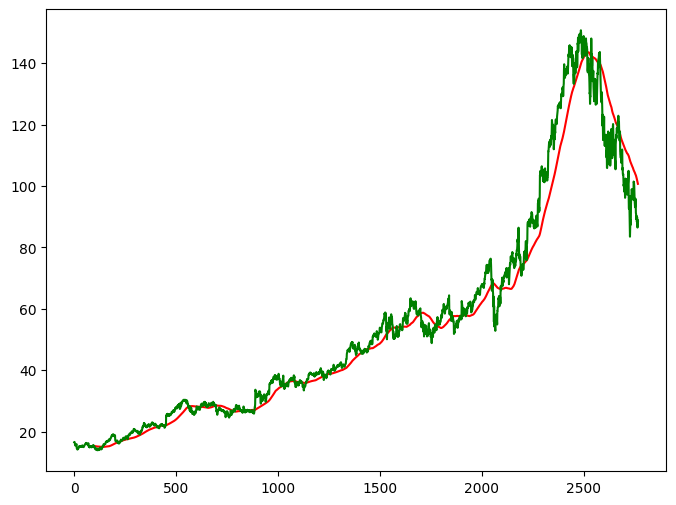

In [5]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, "r")
plt.plot(data.Close, "g")
plt.show()

In [6]:
ma_200_days = data.Close.rolling(200).mean()

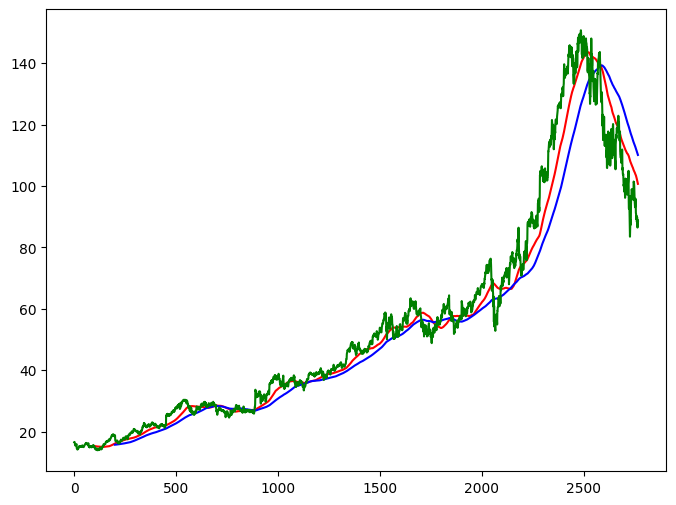

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, "r")
plt.plot(ma_200_days, "b")
plt.plot(data.Close, "g")
plt.show()

In [8]:
data.dropna(inplace=True)

In [9]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [10]:
data_train.shape[0]

2214

In [11]:
data_test.shape[0]

554

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_scaled = scaler.fit_transform(data_train)

In [14]:
x = []
y = []
for i in range(100, data_train_scaled.shape[0]):
    x.append(data_train_scaled[i-100:i])
    y.append(data_train_scaled[i,0])

In [15]:
x, y = np.array(x), np.array(y)

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\rapha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [19]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - loss: 0.0741
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0117
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0061
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0057
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0070
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0056
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0053
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0061
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0048
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0043
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0047
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0056
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0040
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0033
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - l

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)           │     10,400 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 100, 50)           │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)           │     26,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)           │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)           │     45,120 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)           │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)               │     96,480 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 120)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 1)                 │        121 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [21]:
pas_100_days = data_train.tail(100)

In [22]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [23]:
data_test_scaled = scaler.fit_transform(data_test)

In [24]:
x = []
y = []
for i in range(100, data_test_scaled.shape[0]):
    x.append(data_test_scaled[i-100:i])
    y.append(data_test_scaled[i,0])
x, y = np.array(x), np.array(y)

In [25]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [26]:
scale = 1/scaler.scale_

In [27]:
y_predict = y_predict*scale

In [28]:
y = y*scale

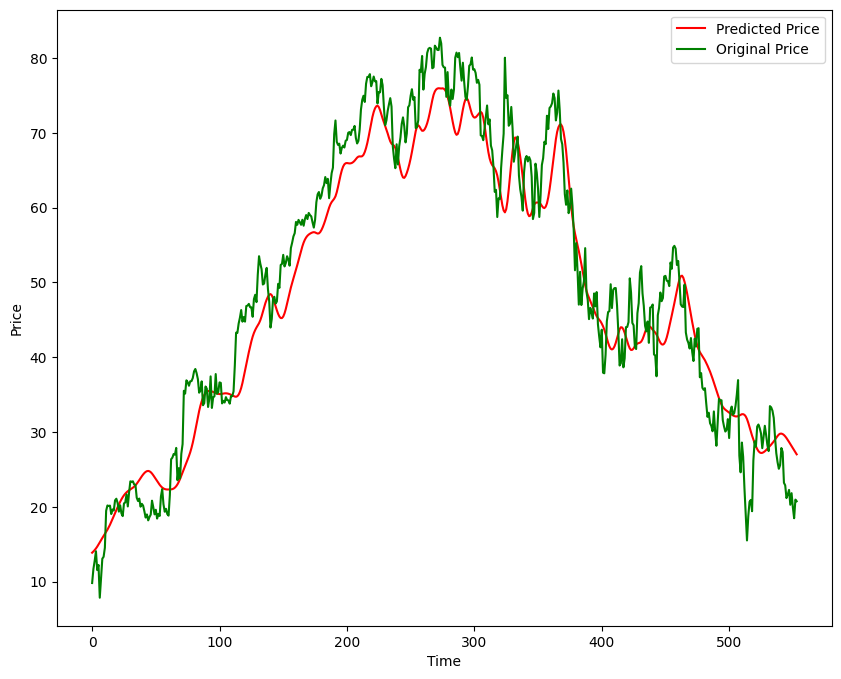

In [29]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, "r", label="Predicted Price")
plt.plot(y, "g", label="Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [30]:
model.save("Stock Predictions Model.keras")